In [1]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


# Import train_test_split.
from sklearn.linear_model import LogisticRegression

# Import logistic regression

In [85]:
# Import Data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [28]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names

In [ ]:
# Background Research



In [29]:
# View Data info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [30]:
# train data manipulation

# train.rename(columns={'date': 'date_col'}, inplace=True)
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


**Data Exploration**

<AxesSubplot:>

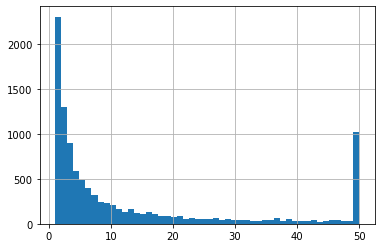

In [31]:
# Distribution of mosquitos found

train['nummosquitos'].hist(bins=50) # Ceiling at 50 is reflective of how the data is entered

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

If the mosquito traps are only inspected ONCE a day, will only expect more than one entry for the specific location/trap/date if one of the entry has 50 mosquitos 

In [32]:
print(train.shape)
# train.groupby(list(train.columns))[list(train.columns)].mean().shape

(10506, 12)


In [33]:
# Create a list of columns without 'nummosquitos'

col_w = list(train.columns)
col_w.remove('nummosquitos') # this includes all the column names except for 'nummosquitos'
#col_w

In [34]:
# Inspect dulplicated rows where number of mosquito count is less than 50

mos_u50 = train.loc[train['nummosquitos']<50,:] # slice data for nummosquitos < 50

edup = mos_u50.duplicated(keep=False)       # find index of data which are exact duplicates
dup = mos_u50[col_w].duplicated(keep=False) # find index of data which have same are duplicates except 'nummosquitos'

In [35]:
print(mos_u50[edup].shape)
print(mos_u50[dup].shape)

(208, 12)
(1537, 12)


In [36]:
# View some data which are duplicates except 'nummosquitos'

mos_u50[dup][:6] 

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,35,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0


There are entries that have the same date, location, trap with different number of mosquitos.

This could mean that the data is not entered as we expect, there are data entry errors, traps are checked more than once a day or others. As we are unable to discern duplicates/errors from True values, we will assume that ALL ENTRIES ARE VALID.

In [37]:
# base rate of wnvpresent BEFORE transformation

train['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

In [38]:
# To merge rows if they have the same date, location, trap
# Create new column to identify those with wnv

col_w.remove('wnvpresent') # ie all columns except wnvpresent and nummosquitos

train_1 = train.groupby(col_w).sum()
train_1.reset_index(inplace=True)

In [39]:
# Create a new column for to indicate if it has wnv

train_1['wnv_binary'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)
train_1[['wnvpresent', 'wnv_binary']].groupby('wnvpresent').sum()

,wnv_binary
wnvpresent,
0,0
1,409
2,31
3,9
4,2
5,1
6,1
7,1
8,1


In [40]:
# Rename column names to the appropriate one

train_1.rename(columns={'wnvpresent': 'wnvcount',
                       'wnv_binary': 'wnvpresent'}, inplace=True)

In [41]:
# to check if lablled correctly

train_1[['wnvcount', 'wnvpresent']].groupby('wnvpresent').sum()

,wnvcount
wnvpresent,
0,0
1,551


In [42]:
# base rate of wnvpresent AFTER transformation

train_1['wnvpresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

In [43]:
train_1.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,38.949381,41.844618,-87.694788,7.941239,15.933805,0.065015,0.053923
std,24.117693,0.106609,0.084063,1.321681,75.084707,0.337489,0.225880
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,0.000000
25%,14.000000,41.750498,-87.752329,8.000000,2.000000,0.000000,0.000000
50%,37.000000,41.857402,-87.694991,8.000000,4.000000,0.000000,0.000000
75%,58.000000,41.944869,-87.642984,9.000000,11.000000,0.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,2532.000000,10.000000,1.000000


In [44]:
train_1['date'] = pd.to_datetime(train_1['date'])
train_1['date_col'] = train_1['date']

# Set Date to be in the index

train_1.set_index('date', inplace=True)

In [45]:
train_1

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent,date_col
date,,,,,,,,,,,,,
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,0,2007-05-29
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,0,2007-05-29
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0,0,2007-05-29
2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,0,2007-05-29
2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0,0,2007-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,6,0,0,2013-09-26
2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,4,0,0,2013-09-26
2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,4,0,0,2013-09-26


In [46]:
train_1.isnull().sum()

address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvcount                  0
wnvpresent                0
date_col                  0
dtype: int64

In [48]:
train_1.loc['2011-07'].resample('W').mean()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent
date,,,,,,,
2011-07-17,37.501887,41.849773,-87.695882,7.867925,17.313208,0.000000,0.000000
2011-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,37.613636,41.845859,-87.701689,7.939394,14.609848,0.041667,0.037879


Text(0.5, 1.0, 'Percentage of traps with WNV by year')

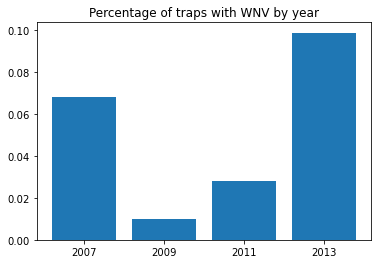

In [49]:
#train_1.resample('Y').mean()['wnvpresent'].plot.bar()
plt.bar(['2007', '2009', '2011', '2013'],train_1.resample('Y').mean().dropna()['wnvpresent'])
plt.title('Percentage of traps with WNV by year')
#train_1.resample('Y').mean().dropna()['wnvpresent']

Text(0, 0.5, 'Month')

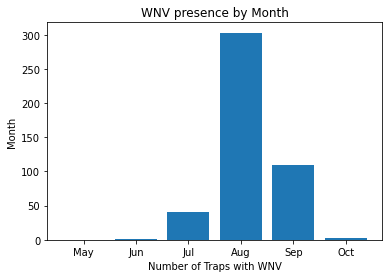

In [5]:
#df[df['Date'].dt.month == 11]
plt.bar(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
        train_1.groupby(train_1['date_col'].dt.month)['wnvpresent'].sum().reset_index()['wnvpresent'])

plt.title('WNV presence by Month')
plt.xlabel('Number of Traps with WNV')
plt.ylabel('Month')

In [142]:
train_1.groupby(['species'])['nummosquitos', 'wnvpresent'].agg({'nummosquitos': 'sum',
                                                                'wnvpresent': ['sum', 'mean']})


C:\Users\User\AppData\Local\Temp/ipykernel_16424/3980106897.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['species'])['nummosquitos', 'wnvpresent'].agg({'nummosquitos': 'sum',


nummosquitos wnvpresent          
                                sum        sum      mean
species                                                 
CULEX ERRATICUS                   7          0  0.000000
CULEX PIPIENS                 44671        240  0.088922
CULEX PIPIENS/RESTUANS        66268        262  0.055135
CULEX RESTUANS                23431         49  0.017883
CULEX SALINARIUS                145          0  0.000000
CULEX TARSALIS                    7          0  0.000000
CULEX TERRITANS                 510          0  0.000000

Most of the mosquitos found are

([CDC](https://www.cdc.gov/westnile/resources/pdfs/MosquitoSpecies1999-2016.pdf))

<AxesSubplot:ylabel='species'>

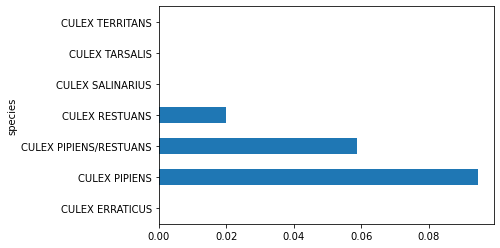

In [11]:
train_1.groupby('species')['wnvpresent'].mean().plot.barh()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

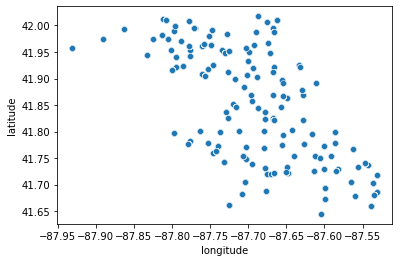

In [9]:
sns.scatterplot(data=train_1, x="longitude", y="latitude")

<AxesSubplot:xlabel='date'>

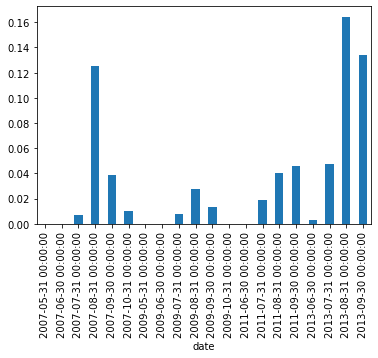

In [237]:
train_1.resample('M').mean().dropna()['wnvpresent'].plot.bar()

In [31]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
#traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

In [ ]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names

# To merge rows if they have the same date, location, trap

col_w = list(train.columns)
col_w.remove('nummosquitos')
col_w.remove('wnvpresent') # ie all columns except wnvpresent and nummosquitos
print(col_w)

train_1 = train.groupby(col_w).sum() # collapse rows that have same values in columns col_w
train_1.reset_index(inplace=True)    # create new df from those collapsed rows


# Create a new column for to indicate if it has wnv

train_1['wnv_binary'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)
train_1[['wnvpresent', 'wnv_binary']].groupby('wnvpresent').sum()

train_1.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       'wnv_binary': 'wnvpresent'}, inplace=True)


train_1['date'] = pd.to_datetime(train_1['date']) # convert date type
train_1['date_col'] = train_1['date']             # create another column of date

# Set Date to be in the index

train_1.set_index('date', inplace=True)           # set date to be index

In [44]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [117]:
train_2

,year,latitude,longitude,wnvcount
0,2007,41.644612,-87.604498,1
1,2007,41.659112,-87.538693,5
2,2007,41.662014,-87.724608,7
3,2007,41.673408,-87.599862,36
4,2007,41.678618,-87.559308,1
...,...,...,...,...
338,2013,41.992478,-87.862995,5
339,2013,41.994679,-87.770899,1
340,2013,42.008314,-87.777921,4
341,2013,42.009876,-87.807277,7


In [128]:
# Create a dataframe for each year with lat long and the cumulative occurence of virus
# col_w.remove('species')
to_keep = ['date', 'latitude', 'longitude', 'wnvpresent']

train_2 = train[to_keep].copy()

train_2['date'] = pd.to_datetime(train_2['date']) # convert date type
train_2['year'] = train_2['date'].dt.year         # create another column of date
train_2.drop(columns='date', inplace=True)


train_2 = train_2.groupby(['year', 'latitude', 'longitude']).sum() # collapse rows that have same values in columns col_w
train_2.reset_index(inplace=True)    # create new df from those collapsed rows

train_2.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       }, inplace=True)

train_2_2007 = train_2.loc[train_2['year']==2007, :]
train_2_2009 = train_2.loc[train_2['year']==2009, :]
train_2_2011 = train_2.loc[train_2['year']==2011, :]
train_2_2013 = train_2.loc[train_2['year']==2013, :]

In [145]:
train_2.groupby('year').sum()

,latitude,longitude,wnvcount
year,,,
2007,4854.039377,-10171.594765,236
2009,3054.923940,-6401.797817,19
2011,3347.763736,-7015.474114,57
2013,3096.607275,-6489.285672,239


In [129]:
train_2_2007

,year,latitude,longitude,wnvcount
0,2007,41.644612,-87.604498,1
1,2007,41.659112,-87.538693,5
2,2007,41.662014,-87.724608,7
3,2007,41.673408,-87.599862,36
4,2007,41.678618,-87.559308,1
...,...,...,...,...
111,2007,42.006858,-87.675919,0
112,2007,42.008314,-87.777921,5
113,2007,42.010412,-87.662140,0
114,2007,42.011601,-87.811506,7


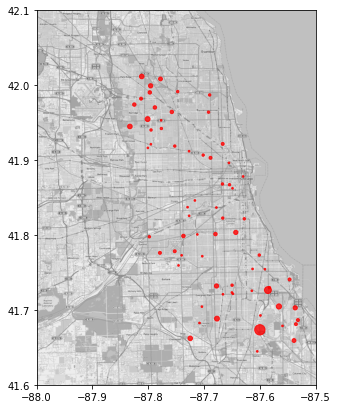

In [130]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_2_2007.loc[:, ['longitude', 'latitude']]

plt.scatter(locations['longitude'], locations['latitude'],
            s=train_2_2007.loc[:, ['wnvcount']]*3,
            alpha=0.8,
            c='red')


Text(0.5, 1.0, 'Traps with WNV - 2013')

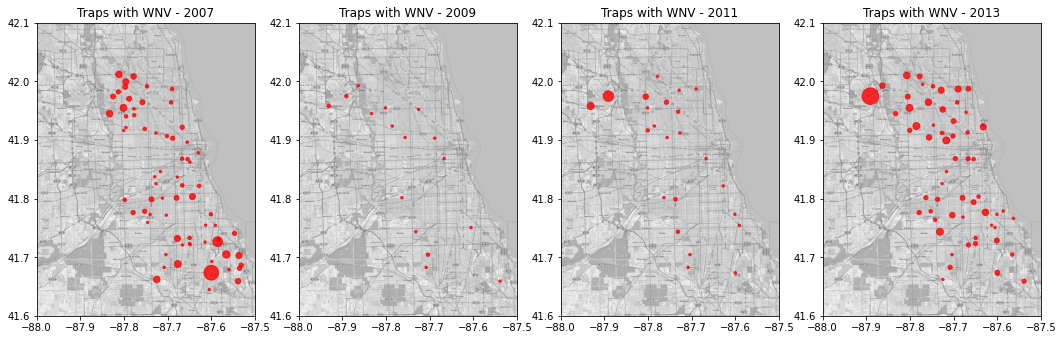

In [141]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_2_2007.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_2_2007.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_2_2009.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_2_2009.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_2_2011.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_2_2011.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_2_2013.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_2_2013.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [ ]:
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
street_map.plot(ax=ax[0], alpha=0.4, color='grey')
street_map.plot(ax=ax[1], alpha=0.4, color='grey')
street_map.plot(ax=ax[2], alpha=0.4, color='grey')
street_map.plot(ax=ax[3], alpha=0.4, color='grey')

geo_train_groupby_2007_WNV.plot(ax=ax[0], markersize=(geo_train_groupby_2007_WNV['WnvPresent']*5).values, color='red', marker='o')
ax[0].set_title('Positive Areas - 2007')

geo_train_groupby_2009_WNV.plot(ax=ax[1], markersize=(geo_train_groupby_2009_WNV['WnvPresent']*5).values, color='red', marker='o')
ax[1].set_title('Positive Areas - 2009')

geo_train_groupby_2011_WNV.plot(ax=ax[2], markersize=(geo_train_groupby_2011_WNV['WnvPresent']*5).values, color='red', marker='o')
ax[2].set_title('Positive Areas - 2011')

geo_train_groupby_2013_WNV.plot(ax=ax[3], markersize=(geo_train_groupby_2013_WNV['WnvPresent']*5).values, color='red', marker='o')
ax[3].set_title('Positive Areas - 2013')

fig.savefig('../charts/02.jpg')

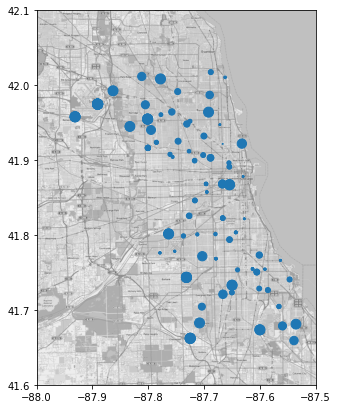

In [75]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = train_2.loc['2009'][['longitude', 'latitude']]
plt.scatter(locations['longitude'], locations['latitude'],
            s=train_2.loc['2009']['nummos'])

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

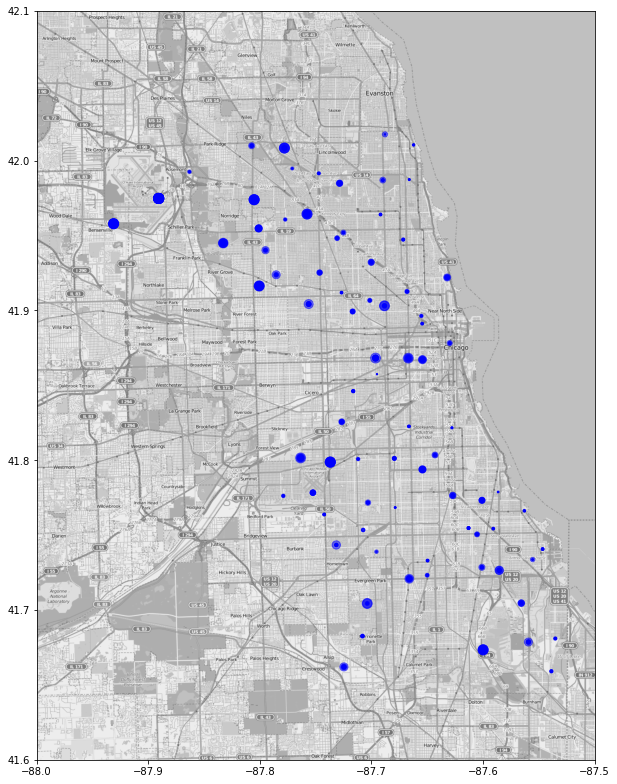

In [74]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = train_2.loc['2011'][['longitude', 'latitude']]
plt.scatter(locations['longitude'], locations['latitude'],
            s=train_2.loc['2011']['nummos'],
            alpha=0.5,
            c='blue'
           )

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

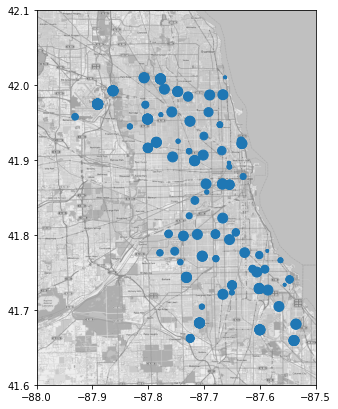

In [71]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = train_2.loc['2013'][['longitude', 'latitude']]
plt.scatter(locations['longitude'], locations['latitude'],
            s=train_2.loc['2013']['nummos'])

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

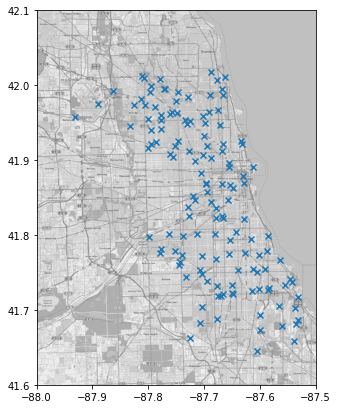

In [33]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

# Code to transform train data

In [6]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names

# To merge rows if they have the same date, location, trap

col_w = list(train.columns)
col_w.remove('nummosquitos')
col_w.remove('wnvpresent') # ie all columns except wnvpresent and nummosquitos
print(col_w)

train_1 = train.groupby(col_w).sum() # collapse rows that have same values in columns col_w
train_1.reset_index(inplace=True)    # create new df from those collapsed rows


# Create a new column for to indicate if it has wnv

train_1['wnv_binary'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)
train_1[['wnvpresent', 'wnv_binary']].groupby('wnvpresent').sum()

train_1.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       'wnv_binary': 'wnvpresent'}, inplace=True)


train_1['date'] = pd.to_datetime(train_1['date']) # convert date type
train_1['date_col'] = train_1['date']             # create another column of date

# Set Date to be in the index

train_1.set_index('date', inplace=True)           # set date to be index

['date', 'address', 'species', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy']


In [53]:
col_w

['date',
 'address',
 'species',
 'block',
 'street',
 'trap',
 'addressnumberandstreet',
 'latitude',
 'longitude',
 'addressaccuracy',
 'nummosquitos',
 'wnvpresent']

## Still under maintenance

In [227]:
mon_label = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [ ]:
fig, axes = plt.subplots(
    nrows=4,
    figsize=(15,12))
axes[0].bar(mon_label,train_1.loc['2007'].resample('M').mean().dropna()['wnvpresent'])        # all years
axes[1].bar(mon_label,train_1.loc['2009'].resample('M').mean().dropna()['wnvpresent']) # stationarity
axes[2].bar(mon_label,train_1.loc['2011'].resample('M').mean().dropna()['wnvpresent'])
axes[3].bar(mon_label,train_1.loc['2013'].resample('M').mean().dropna()['wnvpresent'])

In [220]:
train_1.resample('Y').mean().dropna()['wnvpresent'][0]

0.0681081081081081

In [229]:
train_1.resample('M').mean().dropna()['wnvpresent']

date
2007-05-31    0.000000
2007-06-30    0.000000
2007-07-31    0.006565
2007-08-31    0.125592
2007-09-30    0.038402
2007-10-31    0.009950
2009-05-31    0.000000
2009-06-30    0.000000
2009-07-31    0.008052
2009-08-31    0.027692
2009-09-30    0.013123
2009-10-31    0.000000
2011-06-30    0.000000
2011-07-31    0.018904
2011-08-31    0.040179
2011-09-30    0.045643
2013-06-30    0.002639
2013-07-31    0.047035
2013-08-31    0.164557
2013-09-30    0.133949
Name: wnvpresent, dtype: float64

In [230]:
train_1.loc['2011'].resample('M').mean().dropna()['wnvpresent']

date
2011-06-30    0.000000
2011-07-31    0.018904
2011-08-31    0.040179
2011-09-30    0.045643
Freq: M, Name: wnvpresent, dtype: float64

In [ ]:
# Potential features to engineer

In [29]:
merge_df = pd.read_csv('../data/merged_train_outer.csv')
#test = pd.read_csv('../data/test.csv')

In [30]:
merge_df['date']=pd.to_datetime(merge_df['date'])
merge_df['month'] = merge_df['date'].dt.month

In [31]:
hy = merge_df.loc[merge_df['year'].isin([2007, 2013]), :]
ly = merge_df.loc[merge_df['year'].isin([2009, 2011]), :]

In [32]:
merge_df.groupby('year')[['wnvcount', 'wnvpresent']].sum()

,wnvcount,wnvpresent
year,,
2007,236.0,189.0
2009,19.0,19.0
2011,57.0,50.0
2013,239.0,199.0


In [33]:
merge_df['hl'] = merge_df['year'].map(lambda x : 1 if x in [2007, 2013] else 0)
# merge_df['jul'] = merge_df['month'].map(lambda x : 1 if x == 7 else 0)
# merge_df['jul_int'] = merge_df['jul']*merge_df['preciptotal']

In [34]:
train_1 = merge_df.loc[merge_df['month']==7,:]
#train_1 = merge_df.copy()

In [35]:
x = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc']]
y = train_1['hl']

In [36]:
#t1 = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
#       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
#       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
#       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc', 'hl']]

In [37]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(x, y)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
logreg.score(x, y)

0.8658271819366045

In [39]:
pd.DataFrame(data = logreg.coef_,
             columns = list(x.columns)).T.sort_values(0)

,0
ra,-2.116575
heat,-1.570892
ts,-1.366597
tmin,-0.662519
resultspeed,-0.514647
sunrise,-0.385884
sunset,-0.162764
resultdir,-0.075559
fg,-0.008299
dewpoint,-0.003638


In [40]:
train_1.groupby('hl').mean().T

hl,0,1
latitude,41.844712,41.853466
longitude,-87.698675,-87.696181
nummosquitos,15.024348,21.109937
wnvpresent,0.013043,0.027484
wnvcount,0.013913,0.031712
station,1.789936,1.781161
sprayed,0.000000,0.001057
tmax,83.685304,83.703140
tmin,66.540735,65.170314
tavg,75.113019,74.436727


<AxesSubplot:>

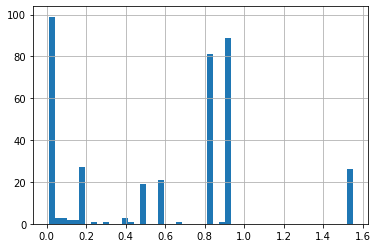

In [95]:
t1.loc[(t1['hl']==1) & t1['preciptotal']>0, 'preciptotal'].hist(bins=50)

<AxesSubplot:>

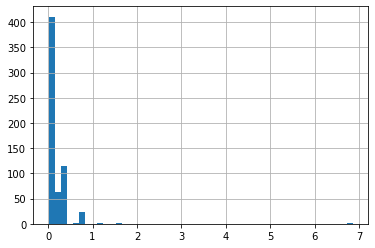

In [96]:
t1.loc[(t1['hl']==0) & t1['preciptotal']>0, 'preciptotal'].hist(bins=50)

In [15]:
train_1 = merge_df.loc[merge_df['month']==8,:]

x = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc']]
y = train_1['hl']

In [16]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(x, y)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
logreg.score(x, y)

0.7823290453622207

In [18]:
pd.DataFrame(data = logreg.coef_,
             columns = list(x.columns)).T.sort_values(0)

,0
ra,-1.154160
resultspeed,-1.123551
stnpressure,-0.330432
sunrise,-0.239914
dewpoint,-0.198106
sealevel,-0.181503
cool,-0.123829
sunset,-0.109036
wetbulb,-0.083070
heat,-0.076294


In [19]:
train_1.groupby('hl').mean().T

hl,0,1
latitude,41.838841,41.837138
longitude,-87.697361,-87.685539
nummosquitos,6.874515,26.667678
wnvpresent,0.034929,0.139605
wnvcount,0.042691,0.174001
station,1.788876,1.832127
sprayed,0.000000,0.004552
tmax,81.269012,84.071394
tmin,64.592509,68.035215
tavg,72.930760,76.053304


In [20]:
train_1[['ra', 'preciptotal']]

,ra,preciptotal
657,0,0.00
658,0,0.00
659,0,0.00
660,0,0.00
661,0,0.00
...,...,...
9653,0,0.00
9654,0,0.36
9655,1,0.47
9656,1,0.07


In [41]:
merge_df = pd.read_csv('../data/merged_train_outer.csv')

In [60]:
train_1 = merge_df.copy()

In [43]:
train_1

,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount,station,sprayed,tmax,...,fu,hz,mi,ra,sn,sq,ts,vc,gr,year
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,1.0,0.0,0.0,2,0.0,88,...,0,1,0.0,0,0,0,0,0,0.0,2007
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,2.0,0.0,0.0,2,0.0,88,...,0,1,0.0,0,0,0,0,0,0.0,2007
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,1.0,0.0,0.0,2,0.0,88,...,0,1,0.0,0,0,0,0,0,0.0,2007
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,1.0,0.0,0.0,2,0.0,88,...,0,1,0.0,0,0,0,0,0,0.0,2007
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,1.0,0.0,0.0,2,0.0,88,...,0,1,0.0,0,0,0,0,0,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9767,2013-10-29,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,57,...,0,1,0.0,1,0,0,0,0,0.0,2013
9768,2013-10-30,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,63,...,0,1,0.0,1,0,0,0,0,0.0,2013
9769,2013-10-30,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,64,...,0,1,0.0,1,0,0,0,0,0.0,2013
9770,2013-10-31,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,64,...,0,0,0.0,1,0,0,0,0,0.0,2013


In [58]:
co = ['date', 'latitude', 'longitude', 'station', 'sprayed', 'tmax', 'tmin', 'tavg',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'month', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+', 'fu', 'hz',
       'mi', 'ra', 'sn', 'sq', 'ts', 'vc', 'gr', 'year']

In [ ]:
# Create dataframe which collapse the species column for Visualisation

col_w.remove('species') # ie all columns except wnvpresent, nummosquitos amd species

train_2 = train_1.groupby(subset=co, as_index=False)

# Refresh 'wnvpresent' variable (ie if wnvpresent or not)
train_2['wnvpresent'] = train_2['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [61]:
train_2= train_1.drop('species', axis=1)

train_2 = train_2.groupby(co, as_index=False).sum()

In [62]:
train_2['wnvpresent'] = train_2['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [71]:
train_2['date'] = pd.to_datetime(train_2['date'])
train_2['month'] = train_2['date'].dt.month
train_2['week'] = train_2['date'].dt.week

C:\Users\User\AppData\Local\Temp/ipykernel_26400/1882689885.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_2['week'] = train_2['date'].dt.week


In [72]:
train_2['week']

0       22
1       22
2       22
3       22
4       22
        ..
4611    39
4612    39
4613    39
4614    39
4615    39
Name: week, Length: 4616, dtype: int64

In [81]:
train_3 = train_2.loc[train_2['month']==8,:]

In [80]:
train_2.groupby(['year', 'month'])[['wnvcount']].sum()

wnvcount
year month          
2007 5           0.0
     6           0.0
     7           6.0
     8         200.0
     9          28.0
     10          2.0
2009 5           0.0
     6           0.0
     7           5.0
     8           9.0
     9           5.0
     10          0.0
2011 6           0.0
     7          11.0
     8          24.0
     9          22.0
2013 6           1.0
     7          24.0
     8         144.0
     9          70.0

In [82]:
# Create a dataframe for each year with lat long and the cumulative occurence of virus
# col_w.remove('species')
to_keep = ['date', 'latitude', 'longitude', 'wnvpresent']

train_plot = train_3[to_keep].copy()

train_plot['date'] = pd.to_datetime(train_plot['date']) # convert date type
train_plot['year'] = train_plot['date'].dt.year         # create another column of date
train_plot.drop(columns='date', inplace=True)


train_plot = train_plot.groupby(['year', 'latitude', 'longitude']).sum() # collapse rows that have same values in columns col_w
train_plot.reset_index(inplace=True)    # create new df from those collapsed rows

train_plot.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       }, inplace=True)

train_plot_2007 = train_plot.loc[train_plot['year']==2007, :]
train_plot_2009 = train_plot.loc[train_plot['year']==2009, :]
train_plot_2011 = train_plot.loc[train_plot['year']==2011, :]
train_plot_2013 = train_plot.loc[train_plot['year']==2013, :]

Text(0.5, 1.0, 'Traps with WNV - 2013')

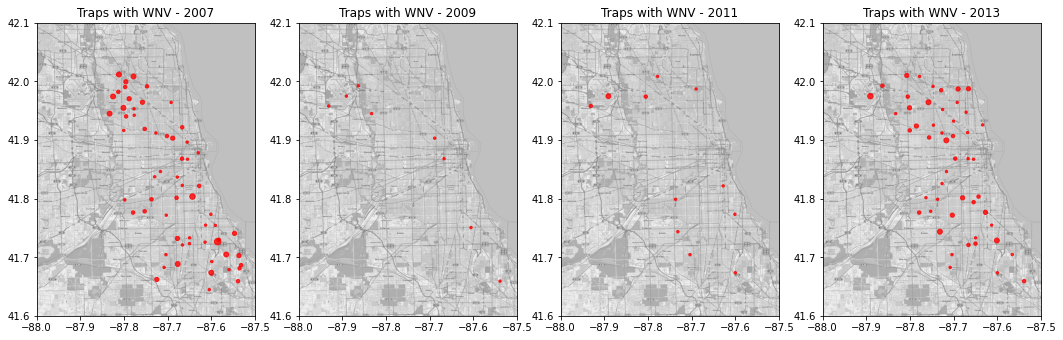

In [83]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [ ]:
train_plot_2007_top = train_plot_2007.sort_values('wnvcount', ascending=False)[:5]
train_plot_2009_top = train_plot_2009.sort_values('wnvcount', ascending=False)[:5]
train_plot_2011_top = train_plot_2011.sort_values('wnvcount', ascending=False)[:5]
train_plot_2013_top = train_plot_2013.sort_values('wnvcount', ascending=False)[:5]

In [ ]:
# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007_top.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009_top.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011_top.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013_top.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [86]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')